# Climate data Prades


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import matplotlib.dates as mdates

## Read data

DOY: day of the year.

T: Temperature [deg C].

RH: Relative humidity [-].

VPD: Vapour pressure deficit [kPa].

R: Radiation [W m-2].

WS: Wind speed [m s-1]. The firs years have mean wind speed while the last ones have maximum wind speed.

P: Precipitation [L m-2] or [mm].

In [5]:
files=glob.glob("*.xls")+glob.glob("*.xlsx")
files=np.sort(files)

df=pd.concat((pd.read_excel(f) for f in files), ignore_index=True) # read and concate all year files.

df["datetime"]=df.apply(lambda x: pd.to_datetime(x["year"], format="%Y") # create the datetime column.
    + pd.DateOffset(days=x["DOY"] - 1, hours=x["time"]/100),
    axis=1,)

df.rename(columns={'temp (ºC)': 'Ta', 'humidity (%)': 'HR','VPD (Kpa)': 'VPD', 'Radiation (W m-2)': 'R','wind speed (m s-1)':'maxWS','mean wind speed (m s-1)': 'meanWS'
,'rainfall (L m-2)':'P'}, inplace=True)

df.loc[(df['HR']<0) | (df['HR']>100),'VPD']=np.nan
df.loc[(df['HR']<0) | (df['HR']>100),'HR']=np.nan # replace values of HR<0 or H>100 by NAN.   

In [7]:
files

array(['Prades_means.xlsx', 'tot 1999.xls', 'tot 2000.xls',
       'tot 2001.xls', 'tot 2002.xls', 'tot 2003.xls', 'tot 2004.xls',
       'tot 2005.xls', 'tot 2006.xls', 'tot 2007.xls', 'tot 2008.xls',
       'tot 2009.xls', 'tot 2010.xls', 'tot 2011.xls', 'tot 2012.xls',
       'tot 2013.xlsx', 'tot 2014.xlsx', 'tot 2015.xlsx', 'tot 2016.xlsx',
       'tot 2017.xlsx', 'tot 2018.xlsx', 'tot 2019.xlsx', 'tot 2020.xlsx',
       'tot 2021.xlsx', 'tot 2022.xlsx'], dtype='<U17')

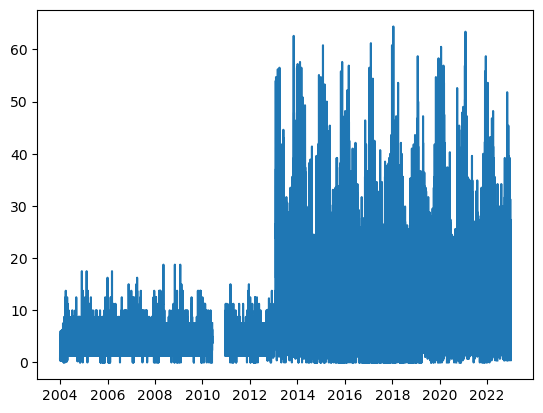

In [70]:

plt.plot(df.datetime,df.maxWS)

In [107]:
df.to_csv('Prades_hourly.csv')

## Aggregate at daily resolution




In [86]:
df_daily=pd.DataFrame()
df_daily=df.resample('d',on='datetime').mean().dropna(how='all')
df_daily['Tmax']=df.resample('d',on='datetime').Ta.max().dropna(how='all')
df_daily['Tmin']=df.resample('d',on='datetime').Ta.min().dropna(how='all')
#df_daily['WSmin']=df.resample('d',on='datetime').maxWS.min().dropna(how='all')
#df_daily['WSmax']=df.resample('d',on='datetime').maxWS.max().dropna(how='all')
df_daily['P']=df.resample('d',on='datetime').P.sum().dropna(how='all')
df_daily['Datetime']=df.resample('d',on='datetime').datetime.mean().dropna(how='all').dt.date
df_daily['Datetime']= pd.to_datetime(df_daily['Datetime'])
df_daily=df_daily.drop('time',axis=1)
df_daily['DOY']=df_daily['Datetime'].dt.dayofyear

df_daily=df_daily.reindex(columns=['Datetime','year','DOY','Ta','Tmax','Tmin','HR','VPD','R','maxWS','P'])
df_daily.rename(columns={"maxWS":"WS"}, inplace = True)

df_daily

,Datetime,year,DOY,Ta,Tmax,Tmin,HR,VPD,R,WS,P
datetime,,,,,,,,,,,
1999-01-01,1999-01-01,1999.0,1,3.664261,4.377,2.368,100.000000,0.000000,13.858130,NaN,6.8
1999-01-02,1999-01-02,1999.0,2,3.489375,7.300,2.118,95.216667,0.041316,55.083542,NaN,0.0
1999-01-03,1999-01-03,1999.0,3,4.997667,8.190,2.839,83.039167,0.161932,109.156958,NaN,0.0
1999-01-04,1999-01-04,1999.0,4,8.441083,13.380,4.587,69.924583,0.363125,115.266458,NaN,0.0
1999-01-05,1999-01-05,1999.0,5,13.511667,19.480,10.710,30.110417,1.086189,122.989167,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,2022-12-27,2022.0,361,5.595750,15.933,0.390,88.666667,0.183180,96.708333,4.456522,0.0
2022-12-28,2022-12-28,2022.0,362,5.340000,15.339,-0.105,83.000000,0.245944,99.541667,6.633333,0.1
2022-12-29,2022-12-29,2022.0,363,9.069000,12.765,4.053,72.583333,0.331708,60.666667,11.583333,0.0


In [90]:
df_daily.to_csv('Prades_daily.csv')

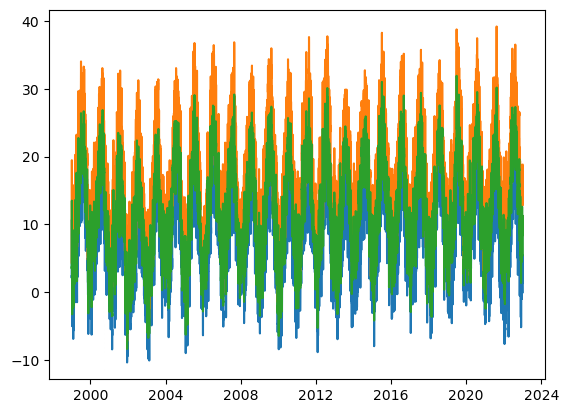

In [82]:
plt.plot(df_daily.Datetime,df_daily.Tmin,)
plt.plot(df_daily.Datetime,df_daily.Tmax)
plt.plot(df_daily.Datetime,df_daily.Ta)

## Aggregate at yearly resolution


In [91]:
df_yearly=pd.DataFrame()
df_yearly=df.resample('y',on='datetime').mean().dropna(how='all')
df_yearly['Tmax']=df.resample('y',on='datetime').Ta.max().dropna(how='all')
df_yearly['Tmax_sd']=df.resample('y',on='datetime').Ta.std().dropna(how='all')
df_yearly['Tmin']=df.resample('y',on='datetime').Ta.min().dropna(how='all')
df_yearly['Tmin_sd']=df.resample('y',on='datetime').Ta.std().dropna(how='all')
df_yearly['P']=df.resample('y',on='datetime').P.sum().dropna(how='all')
df_yearly['Ta_sd']=df.resample('y',on='datetime').Ta.std().dropna(how='all')
df_yearly['HR_sd']=df.resample('y',on='datetime').HR.std().dropna(how='all')
df_yearly['VPD_sd']=df.resample('y',on='datetime').VPD.std().dropna(how='all')
df_yearly['R_sd']=df.resample('y',on='datetime').R.std().dropna(how='all')
df_yearly['WS_sd']=df.resample('y',on='datetime').maxWS.std().dropna(how='all')
df_yearly['P_sd']=df.resample('y',on='datetime').P.std().dropna(how='all')
df_yearly['year']=df.resample('y',on='datetime').datetime.mean().dropna(how='all').dt.year
# df_yearly['Datetime']= pd.to_datetime(df_daily['Datetime'])
df_yearly=df_yearly.drop('time',axis=1)
df_yearly=df_yearly.drop('DOY',axis=1)
df_yearly=df_yearly.reindex(columns=['year','Ta','Tmax','Tmin','HR','VPD','R','maxWS','P','Ta_sd','Tmax_sd','Tmin_sd',
                           'HR_sd','VPD_sd','R_sd','WS_sd','P_sd'])

df_yearly.rename(columns={"maxWS":"WS"}, inplace = True)
df_yearly

df_yearly.to_csv('Prades_yearly.csv')

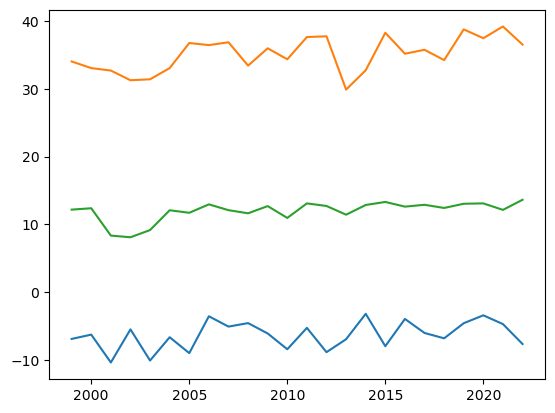

In [27]:
plt.plot(df_yearly.year,df_yearly.Tmin)
plt.plot(df_yearly.year,df_yearly.Tmax)
plt.plot(df_yearly.year,df_yearly.Ta)

## Means during the whole period

In [ ]:
df_means=pd.DataFrame()
df_yearly=df.resample('y',on='datetime').mean().dropna(how='all')
df_yearly['Tmax']=df.resample('y',on='datetime').Ta.max().dropna(how='all')
df_yearly['Tmax_sd']=df.resample('y',on='datetime').Ta.std().dropna(how='all')
df_yearly['Tmin']=df.resample('y',on='datetime').Ta.min().dropna(how='all')
df_yearly['Tmin_sd']=df.resample('y',on='datetime').Ta.std().dropna(how='all')
df_yearly['P']=df.resample('y',on='datetime').P.sum().dropna(how='all')
df_yearly['Ta_sd']=df.resample('y',on='datetime').Ta.std().dropna(how='all')
df_yearly['HR_sd']=df.resample('y',on='datetime').HR.std().dropna(how='all')
df_yearly['VPD_sd']=df.resample('y',on='datetime').VPD.std().dropna(how='all')
df_yearly['R_sd']=df.resample('y',on='datetime').R.std().dropna(how='all')
df_yearly['WS_sd']=df.resample('y',on='datetime').maxWS.std().dropna(how='all')
df_yearly['P_sd']=df.resample('y',on='datetime').P.std().dropna(how='all')
df_yearly['year']=df.resample('y',on='datetime').datetime.mean().dropna(how='all').dt.year
# df_yearly['Datetime']= pd.to_datetime(df_daily['Datetime'])
df_yearly=df_yearly.drop('time',axis=1)
df_yearly=df_yearly.drop('DOY',axis=1)
df_yearly=df_yearly.reindex(columns=['year','Ta','Tmax','Tmin','HR','VPD','R','maxWS','P','Ta_sd','Tmax_sd','Tmin_sd',
                           'HR_sd','VPD_sd','R_sd','WS_sd','P_sd'])

df_yearly.rename(columns={"maxWS":"WS"}, inplace = True)
df_yearly

df_yearly.to_csv('Prades_yearly.csv')

In [105]:
aa=df_daily.mean(axis=0) 

/tmp/ipykernel_13080/2108049762.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  aa=df_daily.mean(axis=0)


In [106]:
aa

year    2010.499553
DOY      183.125257
Ta        11.994553
Tmax      17.196503
Tmin       7.875055
HR        74.810002
VPD        0.484140
R        179.764109
WS         8.521080
P          1.489090
dtype: float64